# Aritificial Neurons
A **single neuron** in a deep neural network is the basic computational unit. It takes in one or more inputs, applies weights to them, sums them up, adds a bias, and passes the result through an **activation function**.

## What a Single Neuron Does:
Mathematically:


$$y = \sigma\left( \sum_{i=1}^{n} w_i x_i + b \right)$$

where:
- $x_i$ = input values
- $w_i$ = weights
- $b$ = bias
- $\sigma$ = activation function (e.g. Sigmoid, ReLU)
- $y$ = output of the neuron

# Single Neuron in Python

In [ ]:
import numpy as np

# Inputs, weights, and bias
inputs = np.array([0.5, 0.8])
weights = np.array([0.4, 0.7])
bias = -0.1

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation
def relu(x):
    return max(0, x)


# Neuron output

# # Approach 1: Wighted sum
# z = sum(w * x for w, x in zip(weights, inputs)) + bias

# Approach 2: using numpy dot product function
z = np.dot(weights, inputs) + bias

output = sigmoid(z)
# output = relu(z)

# Understand **Inputs**, **Weights** and **Bias**

## Input Values($x$)
There are the **features** or **signals** that feed into the neuron.
- In an image: each pixel value (e.g., brightness) is an input.
  - For example, a grayscale image of size 28×28 has 784 inputs (one for each pixel).
- In text: each word or token embedding might be an input.
- In tabular data: each column (feature) is an input.

## Weights($w$)
Weights determine the **importance** of each input.
- A larger weight means the neuron pays more attention to that input.
- A weight of zero means the neuron ignores that input.

## Bias($b$)
The bias allows the neuron to **shift** the activation function left or right.
- Without bias, the neuron would always output zero when all inputs are zero.
- Bias increases the model’s flexibility and ability to fit data.

## Why they are often high-dimensional?
**Real-world data is complex:** images, audio, video, or text involve many features.
- A color image (224×224×3) has over 150,000 input values.
- A 100-word sentence with 300-dim embeddings has 30,000 inputs.

Each input feature needs a corresponding weight, so if inputs are high-dimensional, weights are too.

In deep learning, high dimensionality enables the model to capture complex patterns, but it also requires careful regularization to avoid overfitting.

## Intuition
Think of a single neuron like this:

- Inputs = What the neuron senses
- Weights = What the neuron cares about
- Bias = The neuron's sensitivity threshold
- Activation = The neuron’s decision to act or not

## **Single Neuron Diagram**

<pre>
Input Features →    Weights     →     Sum + Bias     →   Activation   →   Output
  [x₁, x₂, x₃]        [w₁, w₂, w₃]        + b               f(z)             y
      │                   │                 │                 │              │
      └── x₁ × w₁ ──┐     └──── x₂ × w₂ ─┐  │                 ↓              ↓
                    ├───────────────► z = w·x + b ───► f(z) ────────► Output y
      └── x₃ × w₃ ──┘                                (e.g., ReLU, sigmoid)
</pre>



## **From Neuron to Layer**

When you have **multiple neurons** in a layer, each neuron independently performs 'single neuron diagram' computation but with its own weights and bias:

         [x₁, x₂, x₃] → Layer
               ↓
       ┌──────────────┬──────────────┬──────────────┐
       │  Neuron 1    │  Neuron 2    │  Neuron 3    │
       │ w₁·x + b₁    │ w₂·x + b₂    │ w₃·x + b₃    │
       └──────┬───────┴──────┬───────┴──────┬───────┘
              ↓              ↓              ↓
         Output y₁       Output y₂       Output y₃

This gives a vector output (e.g., [y1, y2, y3]) — which can be passed to the next layer in a deep network.


## Example: Real image input (e.g., 28x28 MNIST Digit)
- Input: 784-dimensional vector (28×28 grayscale pixels flattened)
- Hidden layer: 128 neurons → 128 different weight vectors (each size 784)
- Output: 10 neurons (for digits 0–9)

Each layer transforms data into a more **abstract representation**, leading to classification, detection, or prediction at the output.

Single Neuron Output (ReLU): 0.4243057147656587
Layer Output (ReLU): [0.         1.76778288 0.4947008  0.         1.96819568]


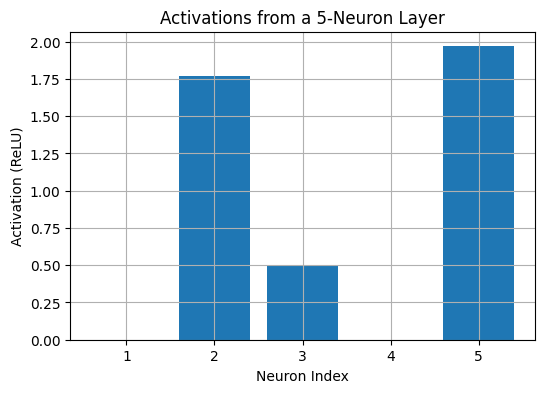

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# input: suppose 3 features
x = np.array([0.6, 0.9, 0.1])

# Single Neuron (random weights + bias)
w = np.random.randn(3)
b = np.random.randn()

# Forward Pass through single neuron
z = np.dot(w, x) + b
output = relu(z)
print("Single Neuron Output (ReLU):", output)

# A layer with 5 neurons
# Simulate a layer with 5 neurons
W = np.random.randn(5, 3)  # 5 neurons, each with 3 input weights
b = np.random.randn(5)     # 5 biases (one per neuron)

# Forward Pass
z = np.dot(W, x) + b
layer_output = relu(z)
print("Layer Output (ReLU):", layer_output)

# Plot the output values of the neurons in the layer
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), layer_output)
plt.xlabel('Neuron Index')
plt.ylabel('Activation (ReLU)')
plt.title('Activations from a 5-Neuron Layer')
plt.grid(True)
plt.show()

## Extended to 2-layer Feedforward Neural Network

In [3]:
# -------------------------------
# Layer 1: 5 neurons (ReLU)
# -------------------------------
W1 = np.random.randn(5, 3)   # shape: (neurons, input_dim)
b1 = np.random.randn(5)      # one bias per neuron

z1 = np.dot(W1, x) + b1
a1 = relu(z1)  # activation output from layer 1

# -------------------------------
# Layer 2: 2 neurons (Sigmoid)
# -------------------------------
W2 = np.random.randn(2, 5)   # shape: (neurons, previous_layer_dim)
b2 = np.random.randn(2)

z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)  # final output

# Print outputs
print("Layer 1 Output (ReLU):", a1)
print("Layer 2 Output (Sigmoid):", a2)

Layer 1 Output (ReLU): [0.52763855 0.33515013 0.         0.         0.77305119]
Layer 2 Output (Sigmoid): [0.37358924 0.22343856]


# **Why Use Different Numbers of Neurons per Layer?**

1. Dimensionality reduction and abstraction
- As you go deeper into the network, the model abstracts features — from low-level (e.g. edges) to high-level (e.g. faces).
- Fewer neurons in deeper layers can force the model to compress knowledge, encouraging generalization.
  - e.x: Image input (784 neurons) → Hidden layer (256) → Hidden (128) → Output (10 classes)

2. Feature Specialization
- Wide early layers let the network capture many low-level patterns.
- Later layers become more specialized and often need fewer neurons to combine features effectively.

3. Regularization by Design
- Using fewer neurons in deeper layers helps prevent overfitting by limiting model capacity.
- It also reduces computational cost.

